    Rok_studiow Stan_cywilny
0             1            W
1             2            W
2             5            M
3             1            W
4             4            M
5             3            W
6             2            M
7             1            W
8             5            M
9             2            W
10            3            M
11            4            M
12            1            W
13            2            W
14            5            M
15            4            M
16            3            M
17            1            M
18            4            M
19            5            W
20            2            W
21            5            M
22            3            W
23            4            W
24            3            M
25            2            W
26            5            M
27            1            W
    Rok_studiow  Stan_cywilny
0             1             0
1             2             0
2             5             1
3             1             0
4        

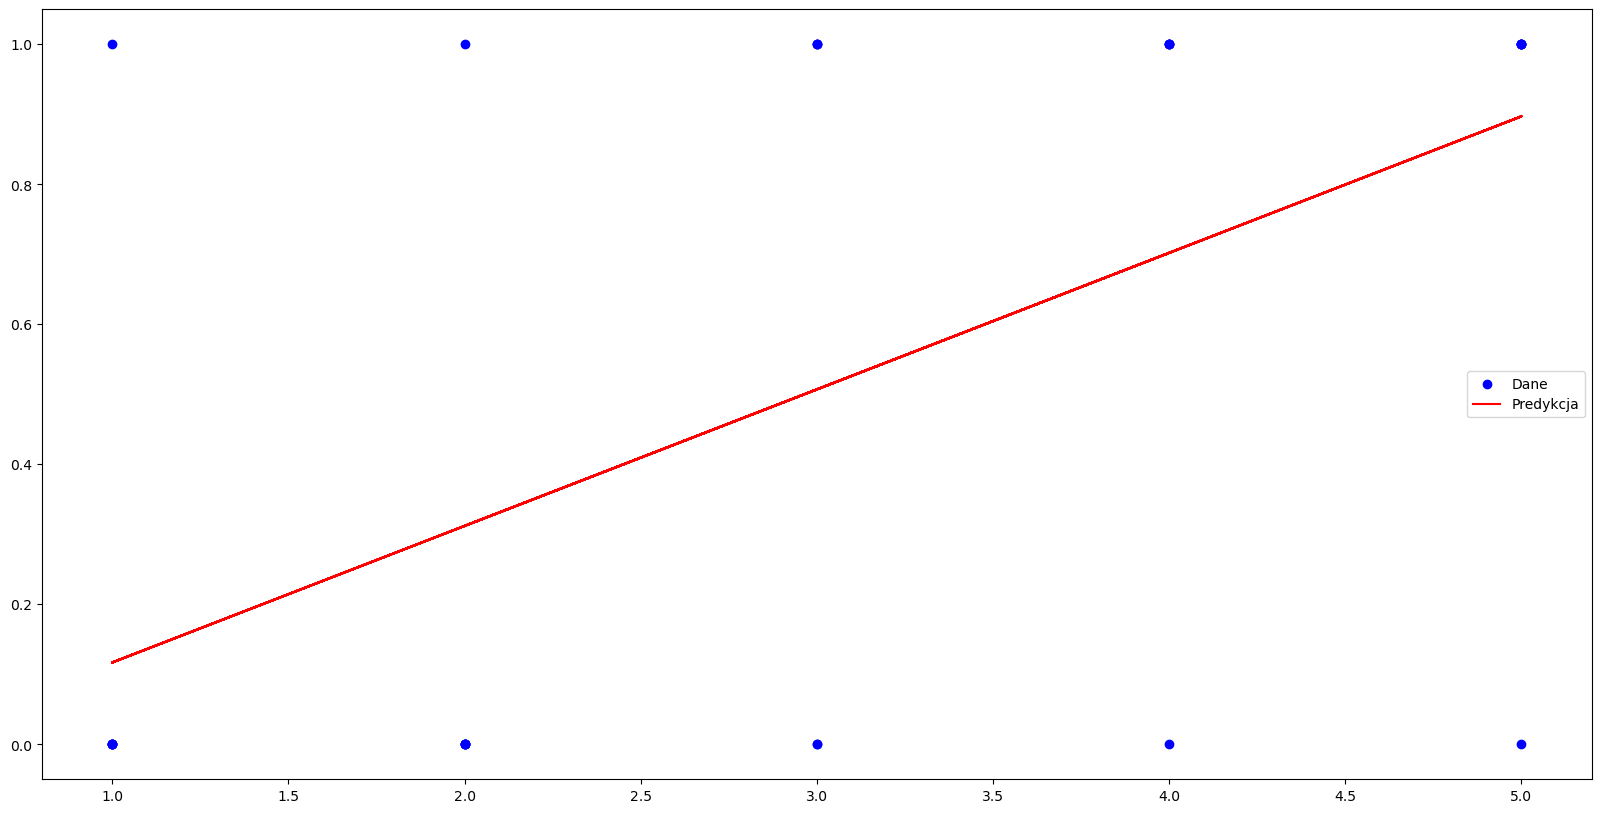

Optimization terminated successfully.
         Current function value: 0.515254
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.515254
         Iterations 6


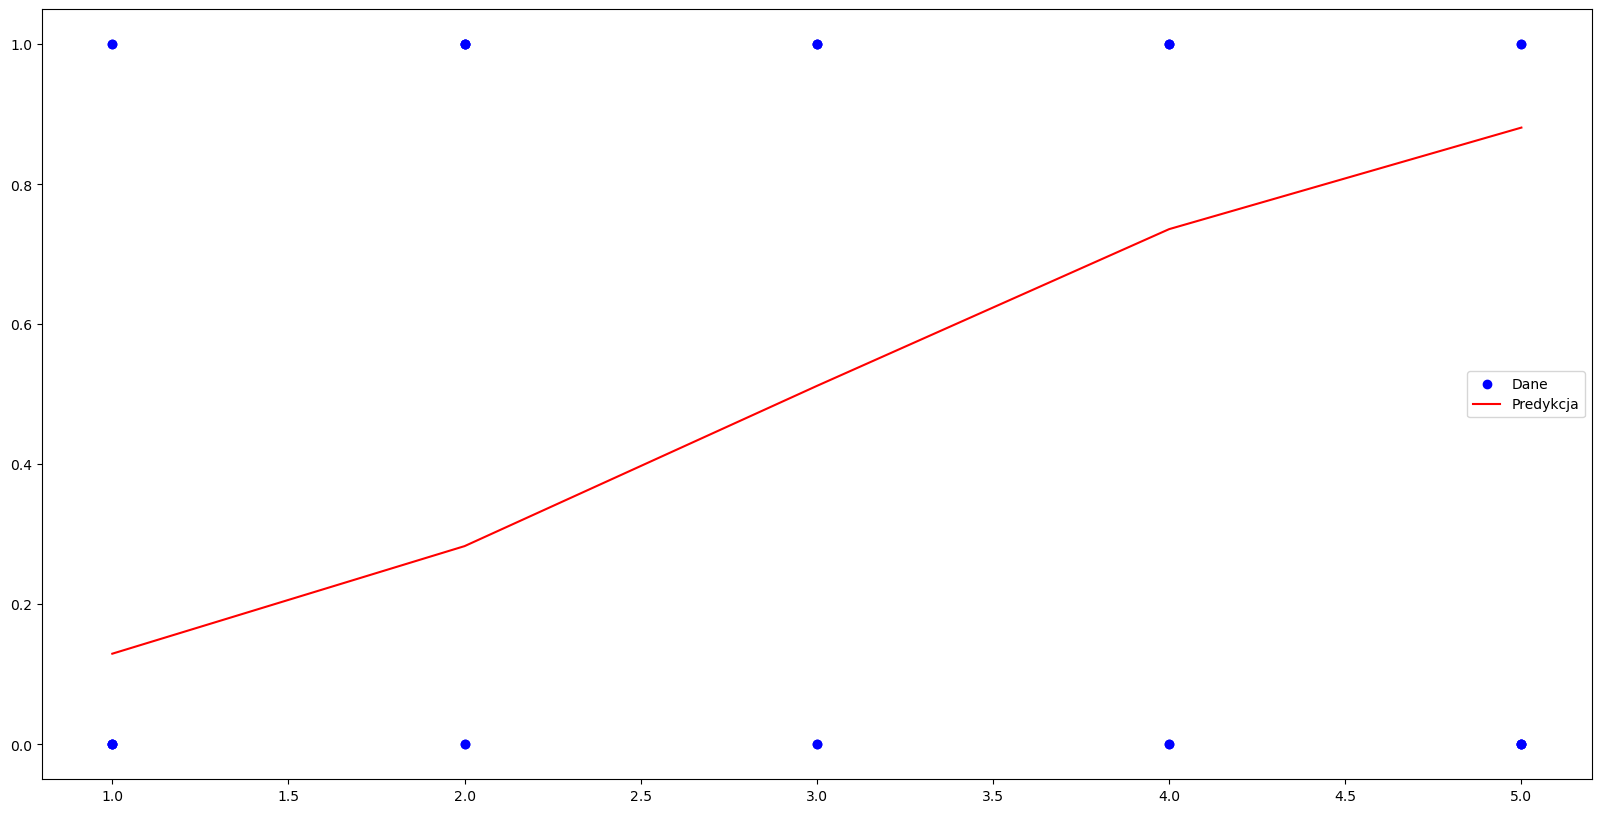

                           Logit Regression Results                           
Dep. Variable:           Stan_cywilny   No. Observations:                   28
Model:                          Logit   Df Residuals:                       26
Method:                           MLE   Df Model:                            1
Date:                Sun, 15 Dec 2024   Pseudo R-squ.:                  0.2566
Time:                        11:57:46   Log-Likelihood:                -14.427
converged:                       True   LL-Null:                       -19.408
Covariance Type:            nonrobust   LLR p-value:                  0.001598
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.8833      1.171     -2.462      0.014      -5.179      -0.588
Rok_studiow     0.9770      0.368      2.655      0.008       0.256       1.698
const         -2.883252
Rok_studiow    0.977006


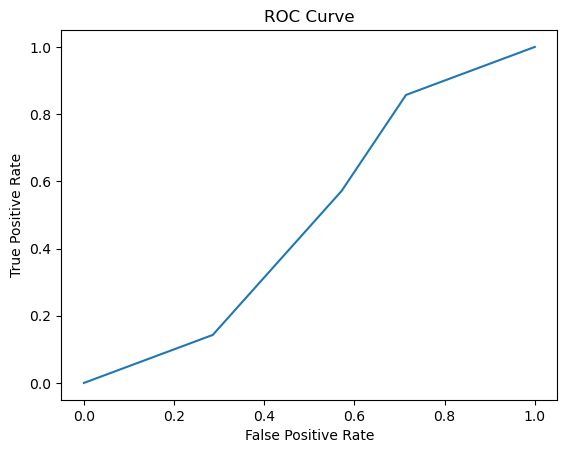

    const  Rok_studiow
0     1.0            1
17    1.0            1
12    1.0            1
7     1.0            1
27    1.0            1
3     1.0            1
13    1.0            2
6     1.0            2
25    1.0            2
9     1.0            2
20    1.0            2
1     1.0            2
24    1.0            3
22    1.0            3
5     1.0            3
10    1.0            3
16    1.0            3
15    1.0            4
4     1.0            4
18    1.0            4
11    1.0            4
23    1.0            4
26    1.0            5
19    1.0            5
2     1.0            5
21    1.0            5
8     1.0            5
14    1.0            5
    const  Rok_studiow
0     1.0            1
17    1.0            1
12    1.0            1
7     1.0            1
27    1.0            1
3     1.0            1
13    1.0            2
6     1.0            2
25    1.0            2
9     1.0            2
20    1.0            2
1     1.0            2
24    1.0            3
22    1.0  

In [36]:
from statistics import LinearRegression

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# dane

data = pd.read_csv('Stan_cywilny.csv', sep=';', header=0)


# logistyczna regresja
# p - prawdopodobieństwo przynależności do klasy 1
# linia decyzyjna
# logreg = LogisticRegression()

# predict_proba - zwraca prawdopodobieństwo przynależności do klasy 0 i 1
# 2 dimmensional array
# druga kolumna - prawdopodobieństwo przynależności do positive class
# threshold - 0.5 - domyślny próg odcięcia dla klasyfikatora binarnego
# krzywa ROC - Receiver Operating Characteristic
# fpr- false positive rate
# tpr- true positive rate

# zeby uzykac tylko positive class
#y_pred_probs = logreg.predict_proba(X_train)[:, 1]
# print(classification_report(y_train, y_pred))
# wyswietli precision, recall, f1-score, support
# optymalizacja - zmiana thresholdu
# uzyj cross validation
# grid search
#print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
#print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

# data
print(data)
# change M to 1 and W to 0
data['Stan_cywilny'] = data['Stan_cywilny'].map({'M': 1, 'W': 0})
print(data)
# model liniowy


# model - regresja logistyczna
X_train = data['Rok_studiow']
y_train = data['Stan_cywilny']

X_train = sm.add_constant(X_train)
# model z a0

model_liniowy = sm.OLS(y_train, X_train).fit()
print(model_liniowy.summary())
# plot
predictions = model_liniowy.predict(X_train)

# Własny wykres predykcji
# Przygotowanie wykresu
plt.figure(figsize=(20, 10))
plt.scatter(X_train['Rok_studiow'], y_train, color='blue', label='Dane')
plt.plot(X_train['Rok_studiow'], predictions, color='red', label='Predykcja')
plt.legend()
plt.show()


logreg= LogisticRegression()

logreg.fit(X_train, y_train)

model_logitowy= sm.Logit(y_train, X_train).fit()
result = sm.Logit(y_train, X_train).fit()

# wykres
y=1/(1+np.exp(-result.predict(X_train)))


# Posortowanie danych według "Rok_studiow"
X_train = X_train.sort_values(by='Rok_studiow', ascending=True)
y = y.loc[X_train.index]  # Dopasowanie etykiet do posortowanych danych

# Tworzenie wykresu
plt.figure(figsize=(20, 10))

# Wykres danych rzeczywistych i predykcji
plt.scatter(X_train['Rok_studiow'], y_train, color='blue', label='Dane')
plt.plot(X_train['Rok_studiow'], model_logitowy.predict(X_train), color='red', label='Predykcja')  # Predykcja
plt.legend()

plt.show()

# Wyświetlenie podsumowania modelu
print(model_logitowy.summary())

# Współczynniki funkcji sigmoid
coef = result.params
print(coef)




y_pred = logreg.predict(X_train)
print(classification_report(y_train, y_pred))
# confusion matrix
print(confusion_matrix(y_train, y_pred))
# prawdopodobieństwo przynależności do klasy 0 i 1

print(y_pred)
y_pred_probs = logreg.predict_proba(X_train)[:, 1]
print(y_pred_probs)
# auc
print("funkcja Wiarygodnosci")
print(roc_auc_score(y_train, y_pred_probs))
# krzywa roc
fpr, tpr, thresholds = roc_curve(y_train, y_pred_probs)





# wykres
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print(X_train)
print(X_train)
print(y_pred)

# print prog decyzyjny




[-1.69512118 -0.82755296  1.77515168 -1.69512118  0.90758346  0.04001525
 -0.82755296 -1.69512118  1.77515168 -0.82755296  0.04001525  0.90758346
 -1.69512118 -0.82755296  1.77515168  0.90758346  0.04001525 -1.69512118
  0.90758346  1.77515168 -0.82755296  1.77515168  0.04001525  0.90758346
  0.04001525 -0.82755296  1.77515168 -1.69512118]
Liczba wystąpień poszczególnych lat dla Stan_cywilny = 0:
Rok_studiow
1    5
2    5
3    2
5    1
4    1
Name: count, dtype: int64


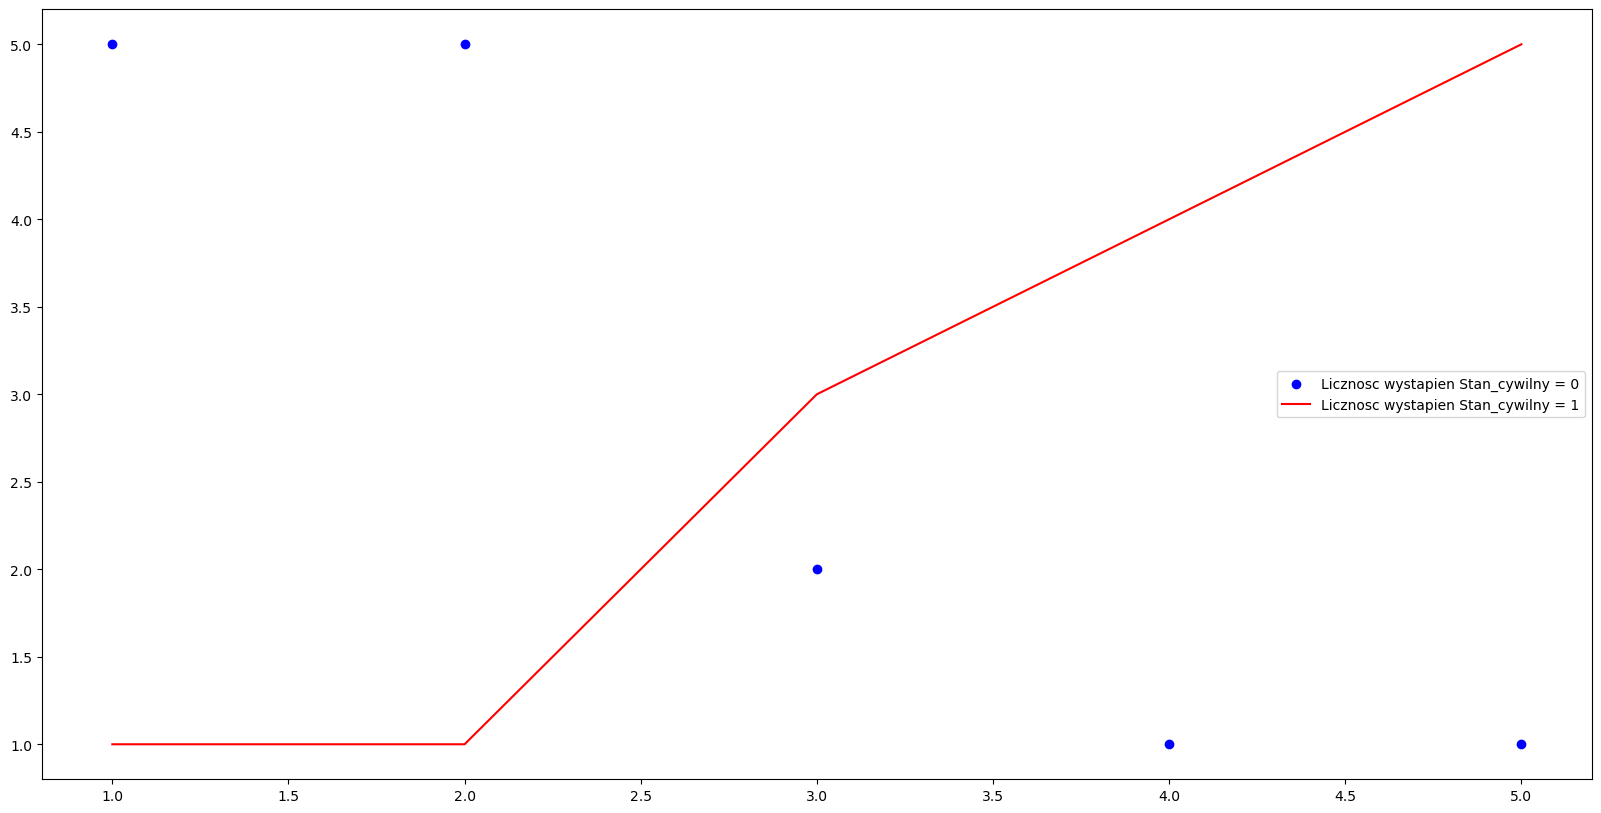



prog [0.15510354 0.30416273 0.85509716 0.15510354 0.71250541 0.51000248
 0.30416273 0.15510354 0.85509716 0.30416273 0.51000248 0.71250541
 0.15510354 0.30416273 0.85509716 0.71250541 0.51000248 0.15510354
 0.71250541 0.85509716 0.30416273 0.85509716 0.51000248 0.71250541
 0.51000248 0.30416273 0.85509716 0.15510354]


In [6]:
#  log odds

# wykres danych zbiczamy ilosc wystąpień 0 i 1 w danym roku studiow

# zmienna posiadajaca wartosci 0 z roku studiow
# Wyodrębnienie wierszy, gdzie Stan_cywilny wynosi 0
# Filtrowanie danych dla Stan_cywilny == 0
rok_studiow_0_counts = data.loc[data['Stan_cywilny'] == 0, 'Rok_studiow'].value_counts()

rok_studiow_1_counts = data.loc[data['Stan_cywilny'] == 1, 'Rok_studiow'].value_counts()

# Wyświetlenie wyników
print("Liczba wystąpień poszczególnych lat dla Stan_cywilny = 0:")
print(rok_studiow_0_counts)

plt.figure(figsize=(20, 10))
plt.scatter(rok_studiow_0_counts.index, rok_studiow_0_counts.values, color='blue', label='Licznosc wystapien Stan_cywilny = 0')
plt.plot(rok_studiow_1_counts.index, rok_studiow_1_counts.values, color='red', label='Licznosc wystapien Stan_cywilny = 1')
plt.legend()
plt.show()




# wykres funkcji